In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors

In [3]:
from xgboost import XGBRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS

from skopt.space import Real, Integer, Categorical

from skopt.utils import use_named_args
from skopt import gp_minimize

from sklearn.model_selection import cross_val_score
import joblib

In [3]:
data = pd.read_csv("ipccAR6_train.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'ipccAR6_train.csv'

In [4]:
smile = data["SMILES"]

for i in smile:
    mol = Chem.MolFromSmiles(i)
    
    MolWt=Chem.Descriptors.MolWt(mol)
    MolLogP=Chem.Descriptors.MolLogP(mol)
    MolMR=Chem.Descriptors.MolMR(mol)
    HeavyAtomCount=Chem.Descriptors.HeavyAtomCount(mol)
    NumHAcceptors=Chem.Descriptors.NumHAcceptors(mol)
    NumHDonors=Chem.Descriptors.NumHDonors(mol)
    NumHeteroatoms=Chem.Descriptors.NumHeteroatoms(mol)
    NumRotatableBonds=Chem.Descriptors.NumRotatableBonds(mol)
    NumValenceElectrons=Chem.Descriptors.NumValenceElectrons(mol)
    NumAromaticRings=Chem.Descriptors.NumAromaticRings(mol)
    NumSaturatedRings=Chem.Descriptors.NumSaturatedRings(mol)
    NumAliphaticRings=Chem.Descriptors.NumAliphaticRings(mol)
    RingCount=Chem.Descriptors.RingCount(mol)
    TPSA=Chem.Descriptors.TPSA(mol)
    LabuteASA=Chem.Descriptors.LabuteASA(mol)
    BalabanJ=Chem.Descriptors.BalabanJ(mol)
    BertzCT=Chem.Descriptors.BertzCT(mol)
    
    print(MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT)

120.02000000000001 1.8137999999999999 12.059000000000003 7 0 0 5 0 44 0 0 0 0 0.0 35.93187015685733 3.541196965079901 51.5907190016011
102.03000000000002 1.5166 12.008000000000003 6 0 0 4 1 38 0 0 0 0 0.0 31.766334753931094 2.9934972434784735 26.52932501298081
102.03000000000002 1.5182000000000002 12.030000000000003 6 0 0 4 0 38 0 0 0 0 0.0 31.7663347539311 3.168489872670569 35.30296890880646
84.04 1.221 11.979000000000003 5 0 0 3 1 32 0 0 0 0 0.0 27.600799351004863 2.5395388613593908 18.854752972273346
84.04 1.5686000000000002 11.729000000000003 5 0 0 3 0 32 0 0 0 0 0.0 27.600799351004863 3.0237157840738176 20.36452797660028
66.05 0.9254 11.950000000000003 4 0 0 2 1 26 0 0 0 0 0.0 23.435263948078628 1.9747448713915894 6.0
66.05 1.2714 11.678000000000003 4 0 0 2 0 26 0 0 0 0 0.0 23.435263948078628 2.3237900077244498 8.75488750216347
48.06 0.9758 11.649000000000003 3 0 0 1 0 20 0 0 0 0 0.0 19.269728545152393 1.6329931618554523 2.7548875021634682
170.027 2.4490999999999996 17.00600000000

152.93 2.3524000000000003 21.549 7 0 0 5 0 44 0 0 0 0 0.0 48.20733180476821 3.541196965079901 56.44547197387445
152.93 2.3524000000000003 21.549 7 0 0 5 1 44 0 0 0 0 0.0 48.20733180476821 3.541196965079901 56.44547197387445
136.47500000000002 2.0831 16.804000000000002 7 0 0 5 0 44 0 0 0 0 0.0 42.06960098081277 3.541196965079901 55.20035947603792
136.475 2.0831 16.804000000000002 7 0 0 5 1 44 0 0 0 0 0.0 42.06960098081277 3.541196965079901 55.20035947603792
134.94 2.0552 21.497999999999998 6 0 0 4 1 38 0 0 0 0 0.0 44.04179640184197 2.9934972434784735 30.52932501298081
134.94 2.0552 21.497999999999998 6 0 0 4 1 38 0 0 0 0 0.0 44.04179640184197 2.9934972434784735 30.52932501298081
134.94 2.0568 21.52 6 0 0 4 1 38 0 0 0 0 0.0 44.04179640184197 3.168489872670569 39.30296890880646
118.48500000000001 1.7875 16.775000000000002 6 0 0 4 0 38 0 0 0 0 0.0 37.904065577886534 3.168489872670569 38.54808140664299
116.95 1.7596 21.468999999999998 5 0 0 3 1 32 0 0 0 0 0.0 39.87626099891573 2.53953886135

In [9]:
Xtrain = pd.read_csv("IP_EA_TRAIN.csv").iloc[0:201,4:14]
Ytrain = pd.read_csv("IP_EA_TRAIN.csv").iloc[0:201,2:3]
Xtest = pd.read_csv("IP_EA_test (2).csv").iloc[:40,4:14]
Ytest = pd.read_csv("IP_EA_test (2).csv").iloc[:40,2:3]

In [10]:
reg = XGBRegressor()
space  = [Integer(1,200, name='n_estimators'),
            Integer(1, 10, name='max_depth'),
            Integer(1, 10, name='num_parallel_tree'),
            Integer(1, 10, name='min_child_weight'),
            Real(0.001,1,"log-uniform",name='learning_rate'),
            Real(0.01,1,name='subsample'),
            Real(0.001,10,"log-uniform",name='gamma'),
            Real(0, 1, name='alpha'),
            Real(2, 10, name='reg_alpha'),
            Real(10, 50, name='reg_lambda')
         ]
@use_named_args(space)

def objective(**params):
    reg.set_params(**params)
    result=-np.mean(cross_val_score(reg, Xtrain.dropna(), Ytrain.dropna(), cv=5, n_jobs=5,
                                        scoring="neg_mean_squared_error"))
    
    print(result)
    return result

res_gp = gp_minimize(objective, space, n_calls=100)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
    - n_estimator=%d
    - max_depth=%d
    - num_parallel_tree=%d
    - min_child_weight=%d
    - learning_rate=%f
    - subsample=%f
    - gamma=%f
    - alpha=%f
    - reg_alpha=%f
    - reg_lambda=%f""" % (res_gp.x[0],res_gp.x[1],
                        res_gp.x[2],res_gp.x[3],
                        res_gp.x[4],res_gp.x[5],
                        res_gp.x[6],res_gp.x[7],
                        res_gp.x[8],res_gp.x[9]
                         ))
reg_opt = XGBRegressor(n_estimators=res_gp.x[0],
                                    max_depth=res_gp.x[1],
                                    num_parallel_tree=res_gp.x[2],
                                    min_child_weight=res_gp.x[3],
                                    learning_rate=res_gp.x[4],
                                    subsample=res_gp.x[5],
                                    gamma=res_gp.x[6],
                                   alpha=res_gp.x[7],
                                   reg_alpha=res_gp.x[8],
                                   reg_lambda=res_gp.x[9]
                                  )
reg_opt.fit(Xtrain, Ytrain)

print('R^2 Training Score: {:.3f} \nR^2 Testing Score: {:.3f}'.format(reg_opt.score(Xtrain, Ytrain),reg_opt.score(Xtest, Ytest)))
print('MAE Training Score: {:.3f} \nMAE Testing Score: {:.3f}'.format(mean_absolute_error(Ytrain,reg_opt.predict(Xtrain)),mean_absolute_error(Ytest,reg_opt.predict(Xtest))))
print('RMSE Training Score: {:.3f} \nRMSE Testing Score: {:.3f}'.format(np.sqrt(mean_squared_error(Ytrain,reg_opt.predict(Xtrain),squared=False)),np.sqrt(mean_squared_error(Ytest,reg_opt.predict(Xtest),squared=False))))

1.3414547075313366
1.1878557476632547
2.0988219956193803
0.6717938886182878
1.660252899351272
1.6617169455371914
1.9425213986708492
0.7611978752965426
1.5268275098371726
0.6986790670887896
2.178996901653002
0.9993160461925626
0.6758207477122984
1.130556273893654
0.7183521325086455
0.7688291489116507
0.7327362384190779
0.6439871618163107
1.0554080234917387
0.6398725551848187
0.6214702429312029
0.6214564432857511
0.6663246737859025
0.6228003530956159
0.6685905189616872
0.6914394969134312
0.6446999343329581
0.6458714344463706
0.8262366817910085
0.6322307642633442
0.6433611087910631
0.6264728158909564
0.9715635371224206
0.6422353974691354
0.6184963052900474
0.6098888267347891
0.6586056634160157
0.6564695706331986
1.4063810452041734
0.8282748096295045
0.6124457592002287
0.645417794689731
0.6831413728934523
0.6785662979067688
2.176938270163286
0.6546866011714954
0.7671888373740485
0.6794346816697773
0.6760617341247223
0.6224046676004921
0.6398852238405924
0.6352552560955734
0.634815378130451

In [11]:
save_model = joblib.dump(reg_opt,"LF.pkl")

In [12]:
model1= joblib.load("LF.pkl")
model2= joblib.load("GWP.pkl")

In [19]:
R2 = r2_score(Ytrain,Y_train_pre_GWP)
R2

0.9742557379629028

In [21]:
rmse = mean_absolute_error(Ytrain,Y_train_pre_GWP)
rmse

0.21352376882893642

In [ ]:
mae = mean_squared_error

In [44]:
Y_train_pre_GWP = model2.predict(Xtrain)
Y_train_pre_GWP

array([ 3.5819075 ,  3.073554  ,  3.3524196 ,  2.6154497 ,  3.9308407 ,
        1.4580618 ,  2.2654696 ,  1.3819451 ,  3.3733056 ,  3.5869143 ,
        3.0991702 ,  3.1777875 ,  3.9507594 ,  2.7997353 ,  3.3997583 ,
        2.2967136 ,  2.6710367 ,  3.0006752 ,  2.24088   ,  2.476025  ,
        3.5285153 ,  2.9438689 ,  3.3907442 , -2.2614045 , -1.3751228 ,
       -1.5283767 , -0.4468042 , -0.80612695, -0.37663618, -0.0955165 ,
       -0.21175447,  0.9701833 ,  0.5055345 , -0.53232265, -0.64721507,
        0.08500779, -0.3878783 ,  3.784785  , -2.3586004 , -1.1826518 ,
       -2.3217623 , -0.91177106,  0.1430703 ,  4.082204  ,  3.8696482 ,
        2.6974669 ,  3.8139396 ,  3.3032925 ,  3.078239  ,  2.9155526 ,
        2.8770735 ,  2.8695226 ,  1.7062787 ,  2.504504  ,  0.0145919 ,
        1.4657259 , -0.06683476,  3.480131  ,  3.4169915 ,  3.2180603 ,
        2.4927845 ,  2.8723814 ,  2.9114218 ,  3.0944698 ,  2.3496108 ,
        2.488455  ,  1.3728447 ,  2.746168  ,  2.6480885 ,  2.53

In [45]:
np.savetxt("Y_train_pre_GWP.txt",Y_train_pre_GWP)

In [41]:
for i in range(10):

    list = []

    for j in range(i*550,(i+1)*550):

        list.append("mol_"+str(j))

# print(type(list))
    np.savetxt("list_"+str(i)+".txt",list, fmt='%s')

Text(0.5, 0, 'Number of features')

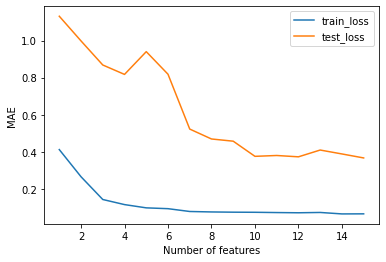

In [230]:
number=10

loss_train=[]
loss_test=[]

for i in range(number):
    X = data.iloc[0:,3:4+i]
    y = data.iloc[0:,2:3]
    Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.2,random_state=60)
    reg_opt = XGBRegressor(n_estimators=63,
                                    max_depth=2,
                                    num_parallel_tree=8,
                                    min_child_weight=3,
                                    learning_rate=0.772693,
                                    subsample=0.296581,
                                    gamma=0.162115,
                                   alpha=0.565215
                                  )
    
    reg_opt.fit(Xtrain, Ytrain)
    
    MAE_train=mean_squared_error(Ytrain,reg_opt.predict(Xtrain))
    MAE_test=mean_squared_error(Ytest,reg_opt.predict(Xtest))
    
    loss_train.append(MAE_train)
    loss_test.append(MAE_test)

f=np.linspace(1,15,15)
plt.plot(f,loss_train,label='train_loss')
plt.plot(f,loss_test,label='test_loss')
plt.legend()
plt.ylabel("MAE")
plt.xlabel("Number of features")

In [4]:
model= joblib.load("LF.pkl")

In [5]:
import shap

In [96]:
X= pd.read_csv("./last/IP_EA_ori.csv",header=1).iloc[:200,2:12]
X

,IP,EA,HOMO_LUMOGAP,MolWt,MolLogP,MolMR,HeavyAtomCount,LabuteASA,BalabanJ,BertzCT
0,0.466143,-0.182417,0.43772,120.020,1.8138,12.0590,7,35.931870,3.541197,51.590719
1,0.442307,-0.180812,0.41552,102.030,1.5166,12.0080,6,31.766335,2.993497,26.529325
2,0.465805,-0.167768,0.42813,102.030,1.5182,12.0300,6,31.766335,3.168490,35.302969
3,0.437769,-0.170737,0.40601,84.040,1.2210,11.9790,5,27.600799,2.539539,18.854753
4,0.482136,-0.188741,0.48056,84.040,1.5686,11.7290,5,27.600799,3.023716,20.364528
...,...,...,...,...,...,...,...,...,...,...
195,0.376943,-0.079025,0.29406,414.108,4.7429,47.4398,25,126.936053,6.396389,475.883928
196,0.402516,-0.099723,0.32347,148.511,1.7600,22.7050,8,49.382553,3.708324,74.928787
197,0.435470,-0.112203,0.38841,386.035,4.4470,35.1530,23,114.222093,5.701847,406.206342
198,0.404793,0.014399,0.21221,316.041,3.5860,31.9580,19,94.711909,6.059230,341.886573


In [6]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

NameError: name 'X' is not defined

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

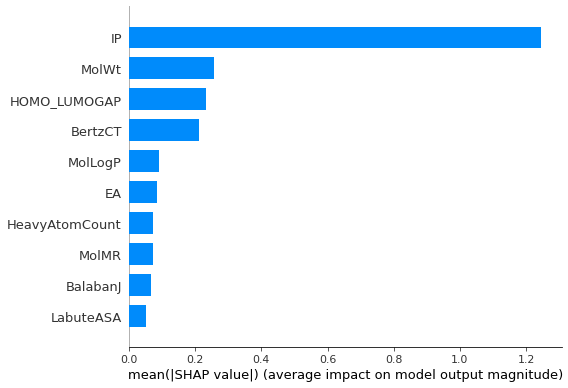

In [98]:
explainer = shap.KernelExplainer(model.predict, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


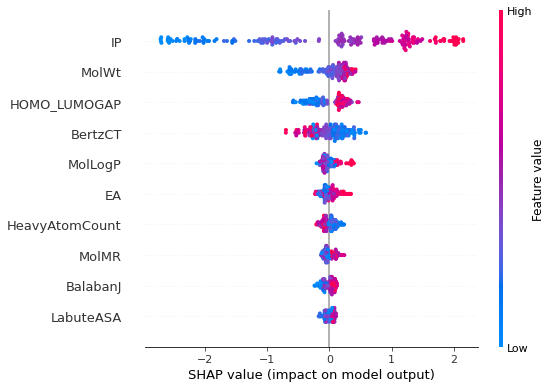

In [99]:
shap.summary_plot(shap_values, X)

In [29]:
smile = data["smiles"]

for i in smile:
    mol = Chem.MolFromSmiles(i)
    
    MolWt=Chem.Descriptors.MolWt(mol)
    MolLogP=Chem.Descriptors.MolLogP(mol)
    MolMR=Chem.Descriptors.MolMR(mol)
    HeavyAtomCount=Chem.Descriptors.HeavyAtomCount(mol)
    NumHAcceptors=Chem.Descriptors.NumHAcceptors(mol)
    NumHDonors=Chem.Descriptors.NumHDonors(mol)
    NumHeteroatoms=Chem.Descriptors.NumHeteroatoms(mol)
    NumRotatableBonds=Chem.Descriptors.NumRotatableBonds(mol)
    TPSA=Chem.Descriptors.TPSA(mol)
    LabuteASA=Chem.Descriptors.LabuteASA(mol)
    BalabanJ=Chem.Descriptors.BalabanJ(mol)
    BertzCT=Chem.Descriptors.BertzCT(mol)
    
    print(MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,TPSA,LabuteASA,BalabanJ,BertzCT)

120.02000000000001 1.8137999999999999 12.059000000000003 7 0 0 5 0 0.0 35.93187015685733 3.541196965079901 51.5907190016011
102.03000000000002 1.5166 12.008000000000003 6 0 0 4 1 0.0 31.766334753931094 2.9934972434784735 26.52932501298081
102.03000000000002 1.5182000000000002 12.030000000000003 6 0 0 4 0 0.0 31.7663347539311 3.168489872670569 35.30296890880646
84.04 1.221 11.979000000000003 5 0 0 3 1 0.0 27.600799351004863 2.5395388613593908 18.854752972273346
84.04 1.5686000000000002 11.729000000000003 5 0 0 3 0 0.0 27.600799351004863 3.0237157840738176 20.36452797660028
66.05 0.9254 11.950000000000003 4 0 0 2 1 0.0 23.435263948078628 1.9747448713915894 6.0
66.05 1.2714 11.678000000000003 4 0 0 2 0 0.0 23.435263948078628 2.3237900077244498 8.75488750216347
48.06 0.9758 11.649000000000003 3 0 0 1 0 0.0 19.269728545152393 1.6329931618554523 2.7548875021634682
170.027 2.4490999999999996 17.006000000000004 10 0 0 7 1 0.0 50.62788307710641 4.403817966606919 110.50985185623556
170.027 2.449

[11:13:37] SMILES Parse Error: syntax error while parsing: C(C(F)(F)Cl)(F)(F)F?
[11:13:37] SMILES Parse Error: Failed parsing SMILES 'C(C(F)(F)Cl)(F)(F)F?' for input: 'C(C(F)(F)Cl)(F)(F)F?'


ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors._CalcMolWt(NoneType)
did not match C++ signature:
    _CalcMolWt(class RDKit::ROMol mol, bool onlyHeavy=False)

In [101]:
X = data.iloc[0:,1:11]

In [44]:
model1= joblib.load("LF.pkl")
model2= joblib.load("GWP.pkl")

In [45]:
# y1=model1.predict(X)
y2=model2.predict(X)

# print(y1)
print(y2)

# np.savetxt("./last/LF_1.txt",y1)
np.savetxt("./last/GWP_1.txt",y2)

ValueError: Feature shape mismatch, expected: 10, got 200

In [3]:
data=pd.read_csv('./last/IP_EA.csv').iloc[0:,2:12]
data

,IP,EA,HOMO_LUMOGAP,MolWt,MolLogP,MolMR,HeavyAtomCount,LabuteASA,BalabanJ,BertzCT
0,0.466143,-0.182417,0.43772,120.020,1.8138,12.0590,7,35.931870,3.541197,51.590719
1,0.442307,-0.180812,0.41552,102.030,1.5166,12.0080,6,31.766335,2.993497,26.529325
2,0.465805,-0.167768,0.42813,102.030,1.5182,12.0300,6,31.766335,3.168490,35.302969
3,0.437769,-0.170737,0.40601,84.040,1.2210,11.9790,5,27.600799,2.539539,18.854753
4,0.482136,-0.188741,0.48056,84.040,1.5686,11.7290,5,27.600799,3.023716,20.364528
...,...,...,...,...,...,...,...,...,...,...
195,0.376943,-0.079025,0.29406,414.108,4.7429,47.4398,25,126.936053,6.396389,475.883928
196,0.402516,-0.099723,0.32347,148.511,1.7600,22.7050,8,49.382553,3.708324,74.928787
197,0.435470,-0.112203,0.38841,386.035,4.4470,35.1530,23,114.222093,5.701847,406.206342
198,0.404793,0.014399,0.21221,316.041,3.5860,31.9580,19,94.711909,6.059230,341.886573


In [5]:
y1=model1.predict(data)
y2=model2.predict(data)

print(y1)
print(y2)

np.savetxt("./last/LF_MLML.txt",y1)
np.savetxt("./last/GWP_MLML.txt",y2)

[ 1.7365229   0.88651514  1.559973    0.45814463  2.3781176  -0.17132059
  0.1973488  -0.09839885  1.3564833   1.8494118   1.1933699   1.1377052
  2.375571    0.5274787   1.3374226   0.39023027  1.2475454   0.925007
  0.48139068  0.42683277  1.7408715   1.0104469   1.7534906  -2.381923
 -2.108089   -1.9214236  -1.5291162  -1.7596455  -1.340837   -1.3152078
 -1.5302228  -0.23091426 -0.6665546  -1.3875228  -1.5262125  -0.0444995
 -1.534068    2.4966087  -2.3401618  -1.9025419  -2.4519107  -1.7474126
 -1.2285802   2.4223316   1.5232756   0.5910497   1.810836    0.9305526
  0.8742691   0.8622506   0.15591344  0.6422035  -0.3270715   0.28482816
 -1.3313106  -0.26015165 -1.0336794   0.6745031   1.3171557   0.9459364
  0.398061    0.7284098   0.49866197  0.7274408   0.36826167  0.4668128
 -0.4631141   0.41555956  0.37508222  0.45402503 -0.58438724 -1.22913
 -0.49592587 -1.5669769   0.28900647  0.91680366  1.0021743   0.56847197
 -2.013231   -0.03397691  0.0183975   0.28482816  0.9764973  -2.3

# train and test

In [104]:
data_train=pd.read_excel('./last/ML.xlsx',sheet_name="train").iloc[0:,3:13]
data_test=pd.read_excel('./last/ML.xlsx',sheet_name="test").iloc[0:,3:13]

In [105]:
# y1=model1.predict(Xtrain)
y2=model2.predict(Xtrain)

# y3=model1.predict(Xtest)
y4=model2.predict(Xtest)

# print(y1,y3)
print(y2,y4)

# np.savetxt("./last/LF_train_1.txt",y1)
np.savetxt("./last/GWP_train_1.txt",y2)
# np.savetxt("./last/LF_test_1.txt",y3)
np.savetxt("./last/GWP_test_1.txt",y4)

[ 3.6398344   3.0204663   3.2997909   2.7380412   3.8708897   1.4453927
  2.2697392   1.6179675   3.314383    3.7120337   3.1093016   3.9649289
  3.3444679   2.3852458   3.0389261   2.2609718   2.3887691   3.4932063
  3.0065687   3.393671   -2.151847   -1.5725174  -1.5343957  -0.85963035
 -0.2720607   0.86007845 -0.59316754 -0.60058635 -0.384342    3.4474525
 -2.2550852  -1.2409538  -2.162622    0.07509093  3.9771485   3.8478436
  2.7500093   3.8535404   3.0522962   2.9843454   2.8924112   1.6124204
 -0.21927406  1.5167396   3.4183526   3.2777429   2.821062    3.1158018
  2.4546092   1.3761191   2.4568331   1.1095154   0.20002222  1.3061683
 -0.77699167  2.7795947   3.3318787  -1.4666735   1.8834981   2.161369
  2.4226055   3.708854   -1.8382629   2.4799128   1.7980933   2.5805962
 -1.8863716   0.14592786 -2.049054    1.9000659   1.4586269   1.7041713
  3.8322384   1.1875088   1.4845235  -0.19559675 -1.3809137   0.82265973
  1.4698279  -1.1692666  -1.0560194   3.4220881   3.7651508   4

In [48]:
data1=pd.read_excel('./last/ML.xlsx',sheet_name="train")
data2=pd.read_excel('./last/ML.xlsx',sheet_name="test")

In [49]:
r2=r2_score(data1["LOG10(tau)"],data1["Pre_LF"])
mae=mean_absolute_error(data1["LOG10(tau)"],data1["Pre_LF"])
rmse=mean_squared_error(data1["LOG10(tau)"],data1["Pre_LF"],squared=False)

print(r2,mae,rmse)

r2=r2_score(data2["LOG10(tau)"],data2["Pre_LF"])
mae=mean_absolute_error(data2["LOG10(tau)"],data2["Pre_LF"])
rmse=mean_squared_error(data2["LOG10(tau)"],data2["Pre_LF"],squared=False)

print(r2,mae,rmse)

0.9399482072392829 0.21663961925594818 0.34336597178469375
0.8608729050508661 0.4161813786981929 0.5950808918645116


Text(0.5, 0, 'EXP')

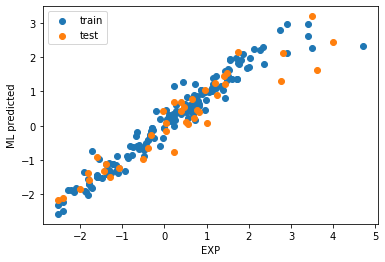

In [50]:
plt.scatter(data1["LOG10(tau)"],data1["Pre_LF"],label='train')
plt.scatter(data2["LOG10(tau)"],data2["Pre_LF"],label='test')
plt.legend()
plt.ylabel("ML predicted")
plt.xlabel("EXP")

In [23]:
r2=r2_score(data1["LOG10(GWP)"],data1["Pre_GWP"])
mae=mean_absolute_error(data1["LOG10(GWP)"],data1["Pre_GWP"])
rmse=mean_squared_error(data1["LOG10(GWP)"],data1["Pre_GWP"],squared=False)

print(r2,mae,rmse)

r2=r2_score(data2["LOG10(GWP)"],data2["Pre_GWP"])
mae=mean_absolute_error(data2["LOG10(GWP)"],data2["Pre_GWP"])
rmse=mean_squared_error(data2["LOG10(GWP)"],data2["Pre_GWP"],squared=False)

print(r2,mae,rmse)

0.995031969915221 0.09296828614400493 0.12842626454663292
0.8896788526510685 0.47089578725275505 0.6169757953453042


Text(0.5, 0, 'EXP')

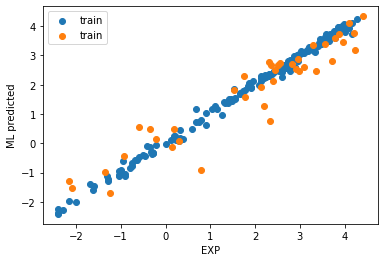

In [14]:
plt.scatter(data1["LOG10(GWP)"],data1["Pre_GWP"],label='train')
plt.scatter(data2["LOG10(GWP)"],data2["Pre_GWP"],label='train')
plt.legend()
plt.ylabel("ML predicted")
plt.xlabel("EXP")

In [81]:
X = data.iloc[0:,4:14]

In [85]:
y1=model1.predict(X)
# y2=model2.predict(X)

print(y1)
# print(y2)

np.savetxt("./last/LF_ML_1.txt",y1)
# np.savetxt("./last/GWP_ML.txt",y2)

[ 1.7365229   0.88651514  1.559973    0.45814463  2.3781176  -0.17132059
  0.1973488  -0.09839885  1.3564833   1.8494118   1.1933699   1.1377052
  2.375571    0.5274787   1.3374226   0.39023027  1.2475454   0.925007
  0.48139068  0.42683277  1.7408715   1.0104469   1.7534906  -2.381923
 -2.108089   -1.9214236  -1.5291162  -1.7596455  -1.340837   -1.3152078
 -1.5302228  -0.23091426 -0.6665546  -1.3875228  -1.5262125  -0.0444995
 -1.534068    2.4966087  -2.3401618  -1.9025419  -2.4519107  -1.7474126
 -1.2285802   2.4223316   1.5232756   0.5910497   1.810836    0.9305526
  0.8742691   0.8622506   0.15591344  0.6422035  -0.3270715   0.28482816
 -1.3313106  -0.26015165 -1.0336794   0.6745031   1.3171557   0.9459364
  0.398061    0.7284098   0.49866197  0.7274408   0.36826167  0.4668128
 -0.4631141   0.41555956  0.37508222  0.45402503 -0.58438724 -1.22913
 -0.49592587 -1.5669769   0.28900647  0.91680366  1.0021743   0.56847197
 -2.013231   -0.03397691  0.0183975   0.28482816  0.9764973  -2.3

In [83]:
data1=pd.read_excel('./last/ML.xlsx',sheet_name="train")
data2=pd.read_excel('./last/ML.xlsx',sheet_name="test")

In [16]:
Xtrain = pd.read_csv("./last/IP_EA_train.csv").iloc[:161,4:14]
Ytrain = pd.read_csv("./last/IP_EA_train.csv").iloc[:161,2:3]
Xtest = pd.read_csv("./last/IP_EA_test.csv").iloc[:40,4:14]
Ytest = pd.read_csv("./last/IP_EA_test.csv").iloc[:40,2:3]

In [2]:
data1=pd.read_csv('./last/IP_EA_train.csv')
data2=pd.read_csv('./last/IP_EA_test.csv')

In [3]:
Xtrain = pd.read_csv("./last/IP_EA_train1.csv").iloc[:161,4:14]
Ytrain = pd.read_csv("./last/IP_EA_train1.csv").iloc[:161,2:3]
Xtest = pd.read_csv("./last/IP_EA_test.csv").iloc[:40,4:14]
Ytest = pd.read_csv("./last/IP_EA_test.csv").iloc[:40,2:3]

data1=pd.read_csv('./last/IP_EA_train1.csv')
data2=pd.read_csv('./last/IP_EA_test.csv')

In [42]:
MAPE1=mean_absolute_percentage_error(Ytrain,data1["LF_pre"])
MAPE2=mean_absolute_percentage_error(Ytest,data2["LF_pre"])

MAE1=mean_absolute_error(Ytrain,data1["LF_pre"])
MAE2=mean_absolute_error(Ytest,data2["LF_pre"])

print(MAPE1,MAPE2,MAE1,MAE2)

0.41526783075958407 0.8120060662055248 0.19682822378481013 0.32358127662499997


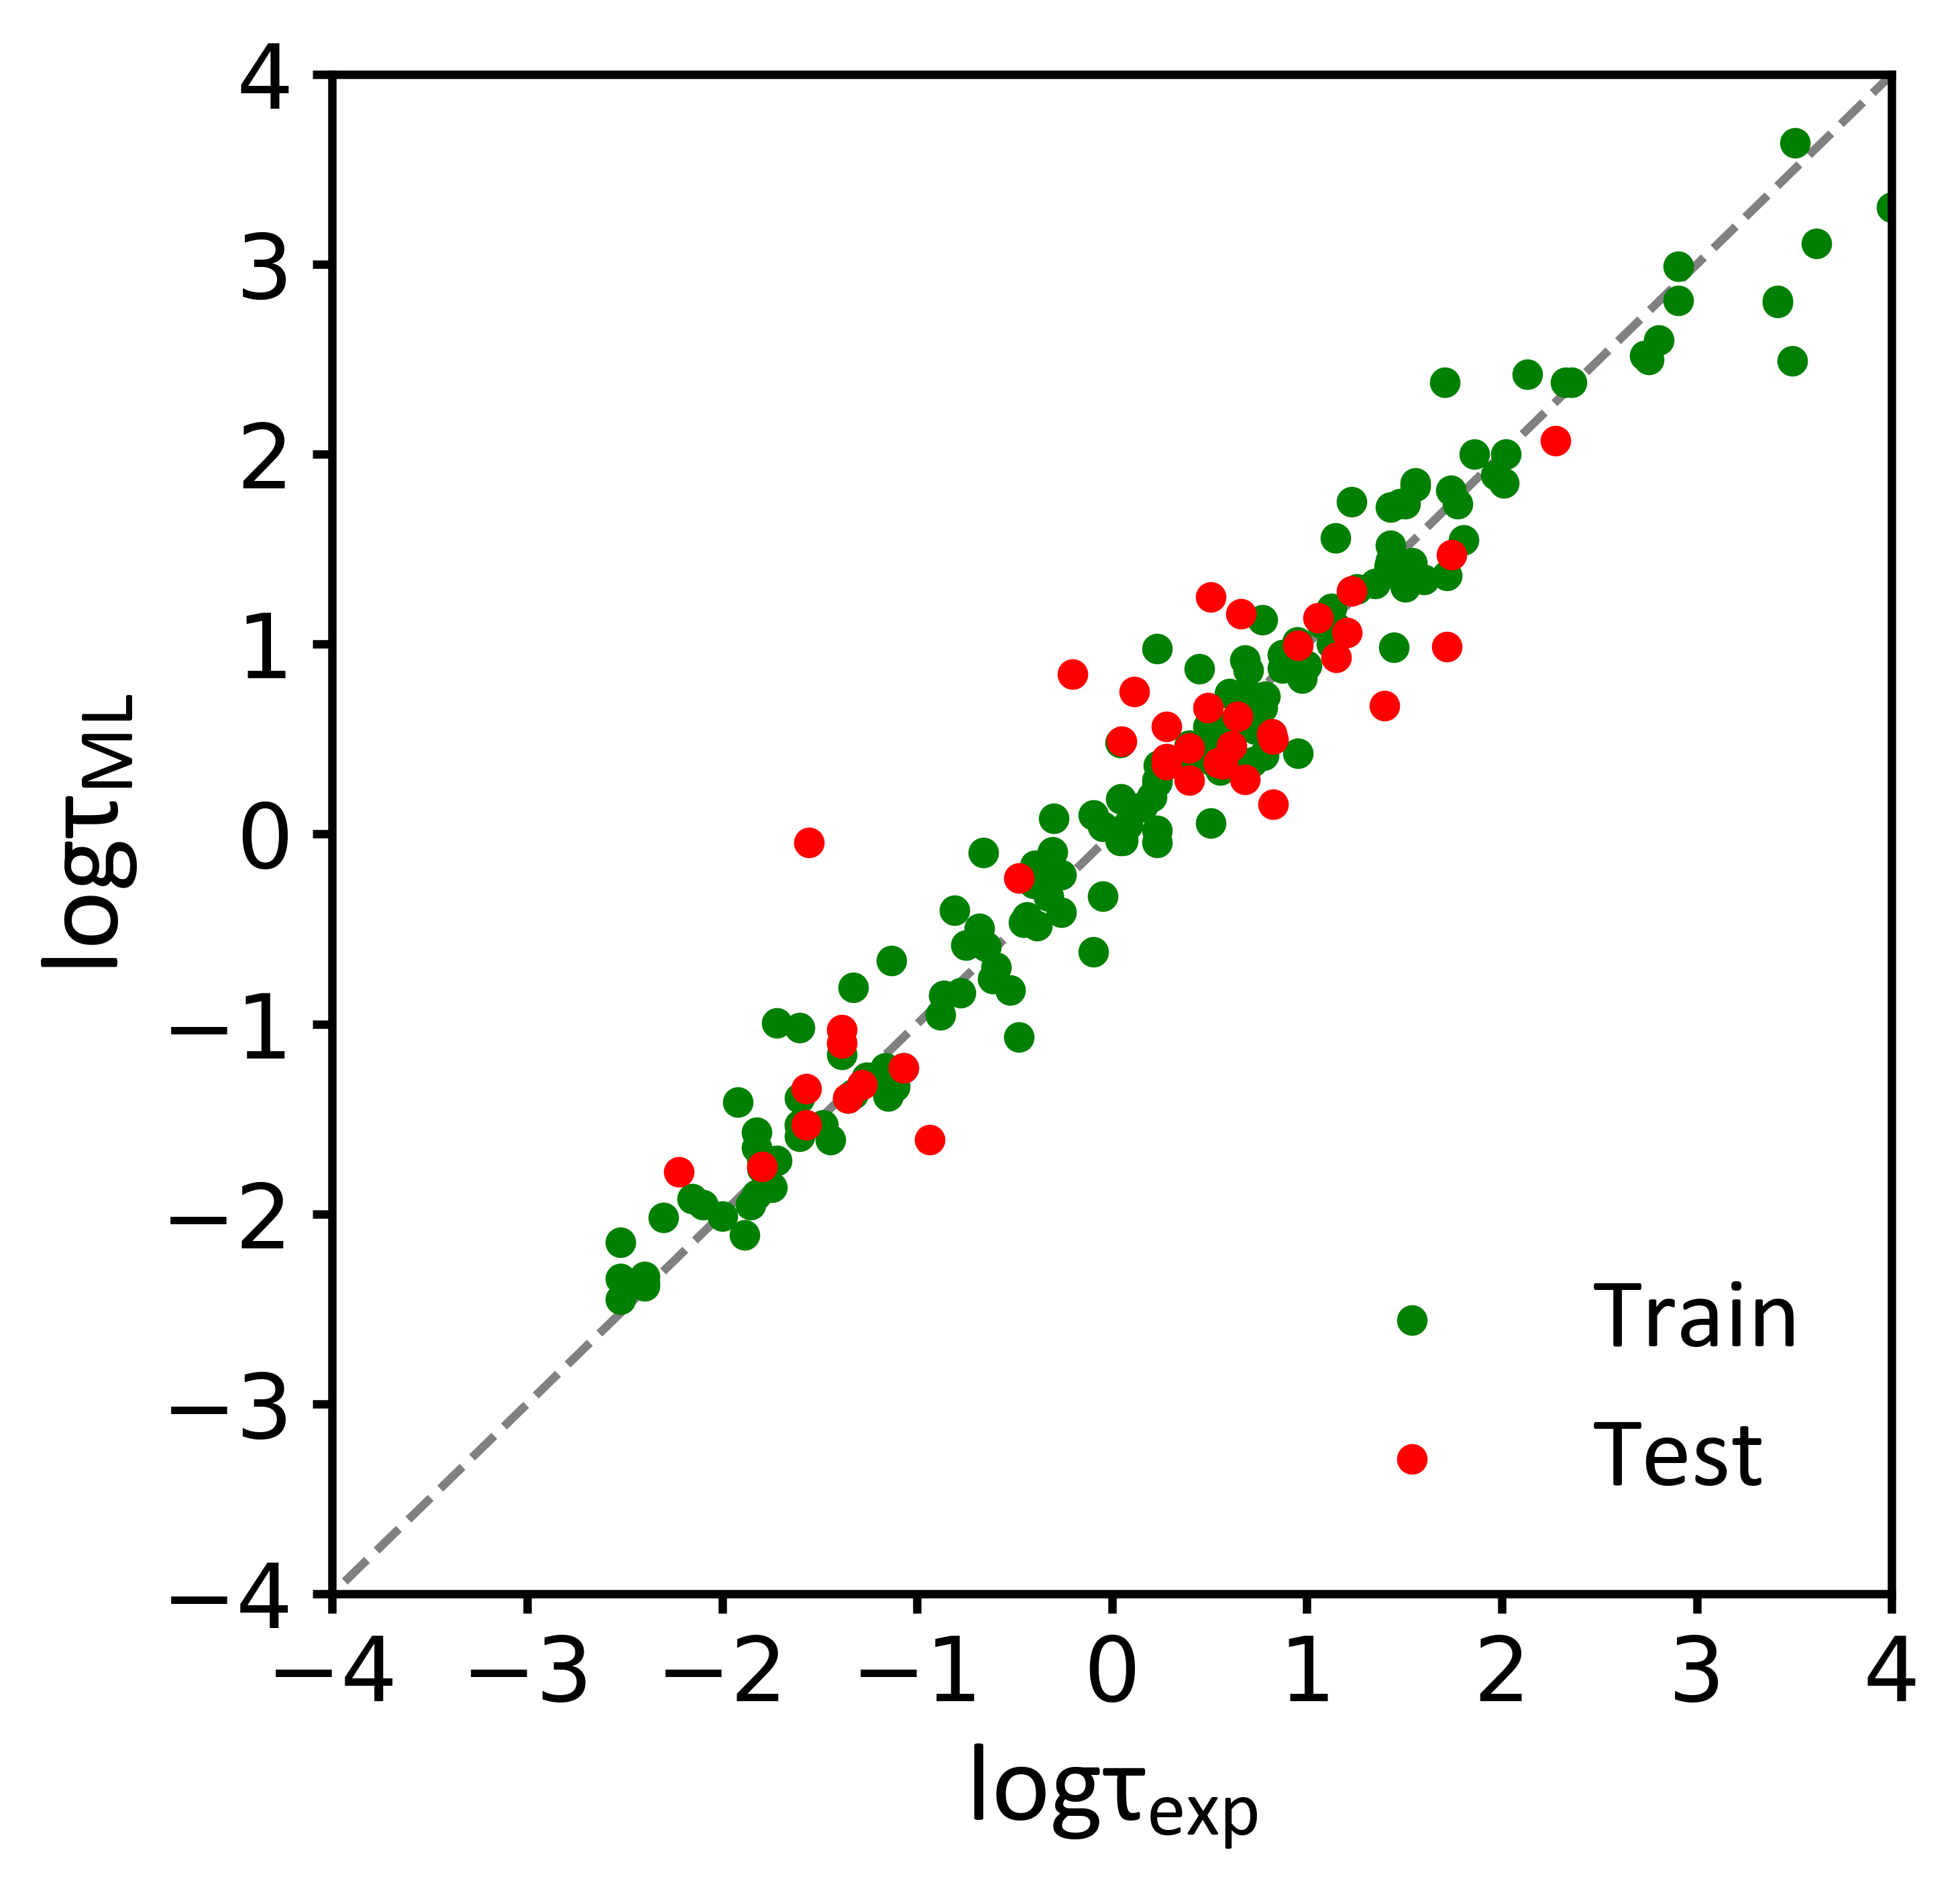

In [7]:
fig, ax = plt.subplots(figsize=(5,5),dpi=600)

x=np.linspace(-10,10)

ax.plot(x,x,'--',c="0.5",zorder=0)

ax1 = ax.scatter(Ytrain,data1["LF_pre"],marker='o',c="green",s=20,label="Train",linewidths=1)
ax2 = ax.scatter(Ytest,data2["LF_pre"],marker='o',c="r",s=20,label="Test",linewidths=1)

ax.set_xlim(-4 ,4)
ax.set_ylim(-4 ,4)


ax.legend(prop={'family':'Calibri','size':18},frameon=False,loc="lower right")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

plt.tick_params(axis='both', which='both', direction='out',width=1.5)
# plt.text(-3,3,"Training set", fontweight='bold',fontdict={'family':'Calibri','size':20})

plt.minorticks_off()

plt.xlabel(r'$\mathregular{logτ_{exp}}$',fontdict={'family':'Calibri','size':20})
plt.ylabel(r"$\mathregular{logτ_{ML}}$",fontdict={'family':'Calibri','size':20})

plt.show()

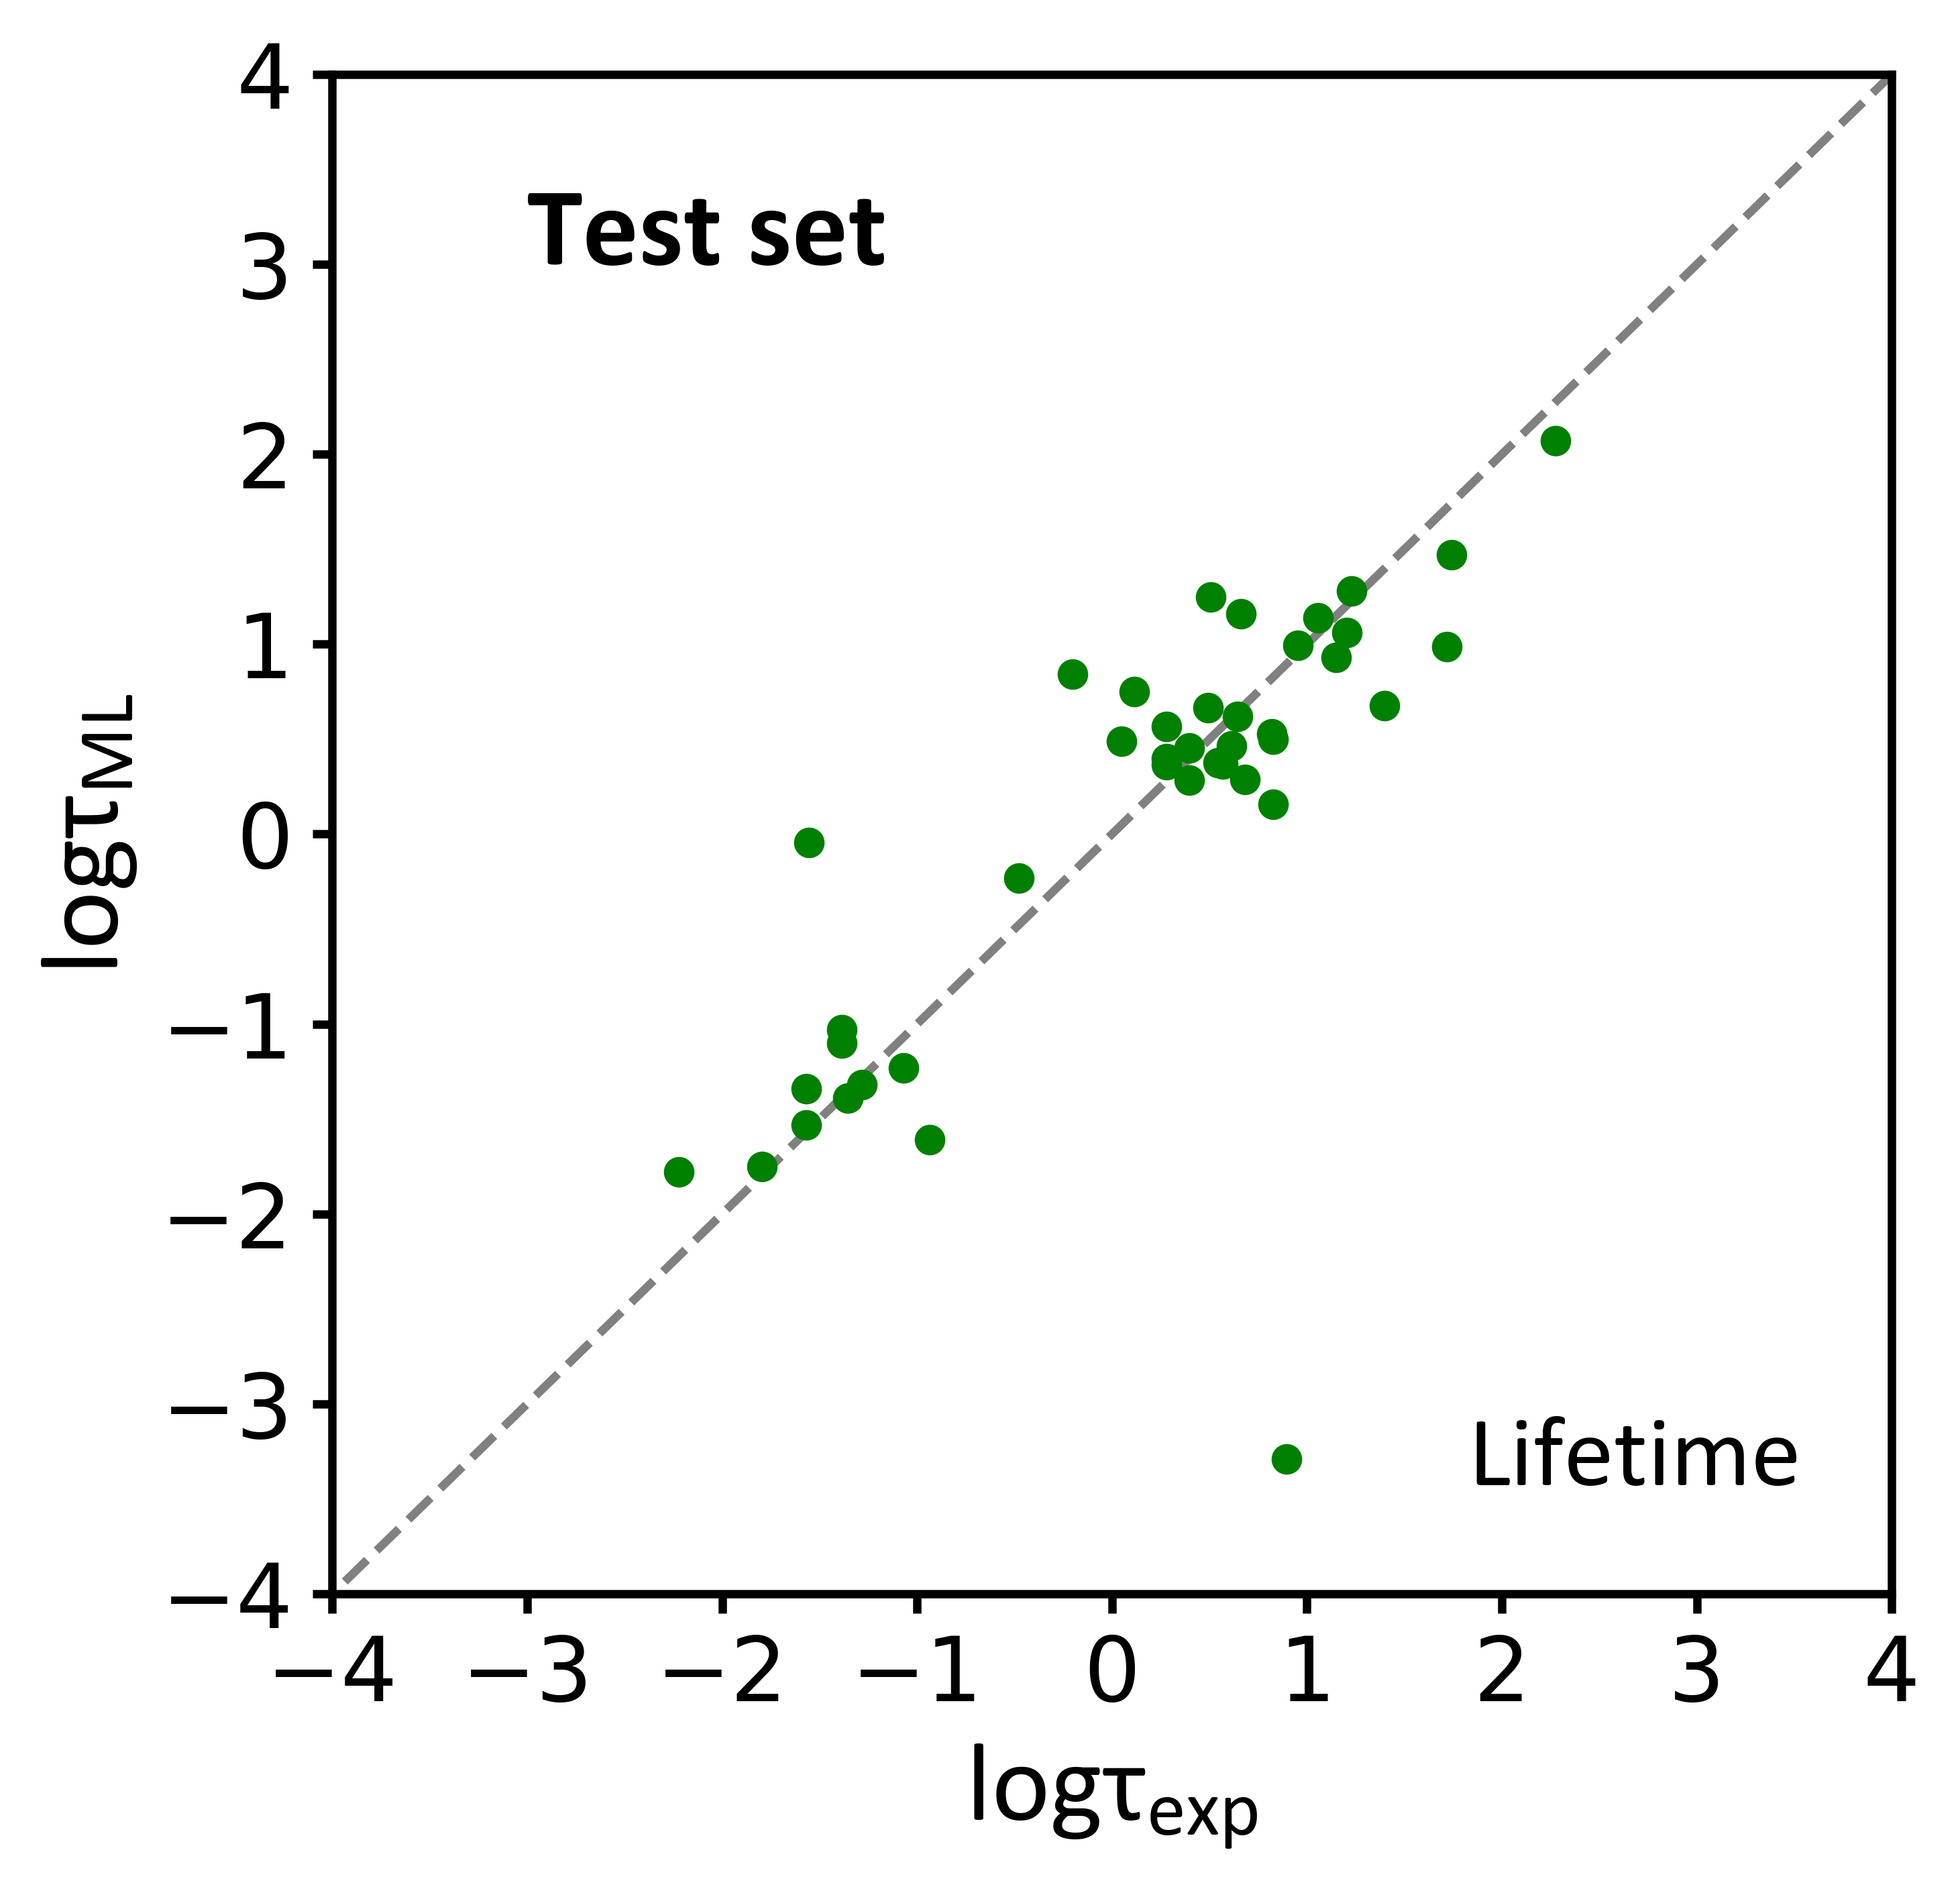

In [84]:
fig, ax = plt.subplots(figsize=(5,5),dpi=600)

x=np.linspace(-10,10)

ax.plot(x,x,'--',c="0.5",zorder=0)

ax1 = ax.scatter(Ytest,data2["LF_pre"],marker='o',c="green",s=20,label="Lifetime",linewidths=1)

ax.set_xlim(-4 ,4)
ax.set_ylim(-4 ,4)

ax.legend(prop={'family':'Calibri','size':18},frameon=False,loc="lower right")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

plt.tick_params(axis='both', which='both', direction='out',width=1.5)
plt.text(-3,3,"Test set", fontweight='bold',fontdict={'family':'Calibri','size':20})

plt.minorticks_off()

plt.xlabel(r'$\mathregular{logτ_{exp}}$',fontdict={'family':'Calibri','size':20})
plt.ylabel(r"$\mathregular{logτ_{ML}}$",fontdict={'family':'Calibri','size':20})

plt.show()

In [13]:
Xtrain = pd.read_csv("./last/IP_EA_train.csv").iloc[:161,4:14]
Ytrain = pd.read_csv("./last/IP_EA_train.csv").iloc[:161,3:4]
Xtest = pd.read_csv("./last/IP_EA_test.csv").iloc[:40,4:14]
Ytest = pd.read_csv("./last/IP_EA_test.csv").iloc[:40,3:4]

In [14]:
data1=pd.read_csv('./last/IP_EA_train.csv')
data2=pd.read_csv('./last/IP_EA_test.csv')

In [15]:
MAPE1=mean_absolute_percentage_error(Ytrain,data1["LF_pre"])
MAPE2=mean_absolute_percentage_error(Ytest,data2["LF_pre"])

MAE1=mean_absolute_error(Ytrain,data1["LF_pre"])
MAE2=mean_absolute_error(Ytest,data2["LF_pre"])

print(MAPE1,MAPE2,MAE1,MAE2)

1.6675998691086917 1.3734360444782454 1.5116882506875 1.7117490713249999


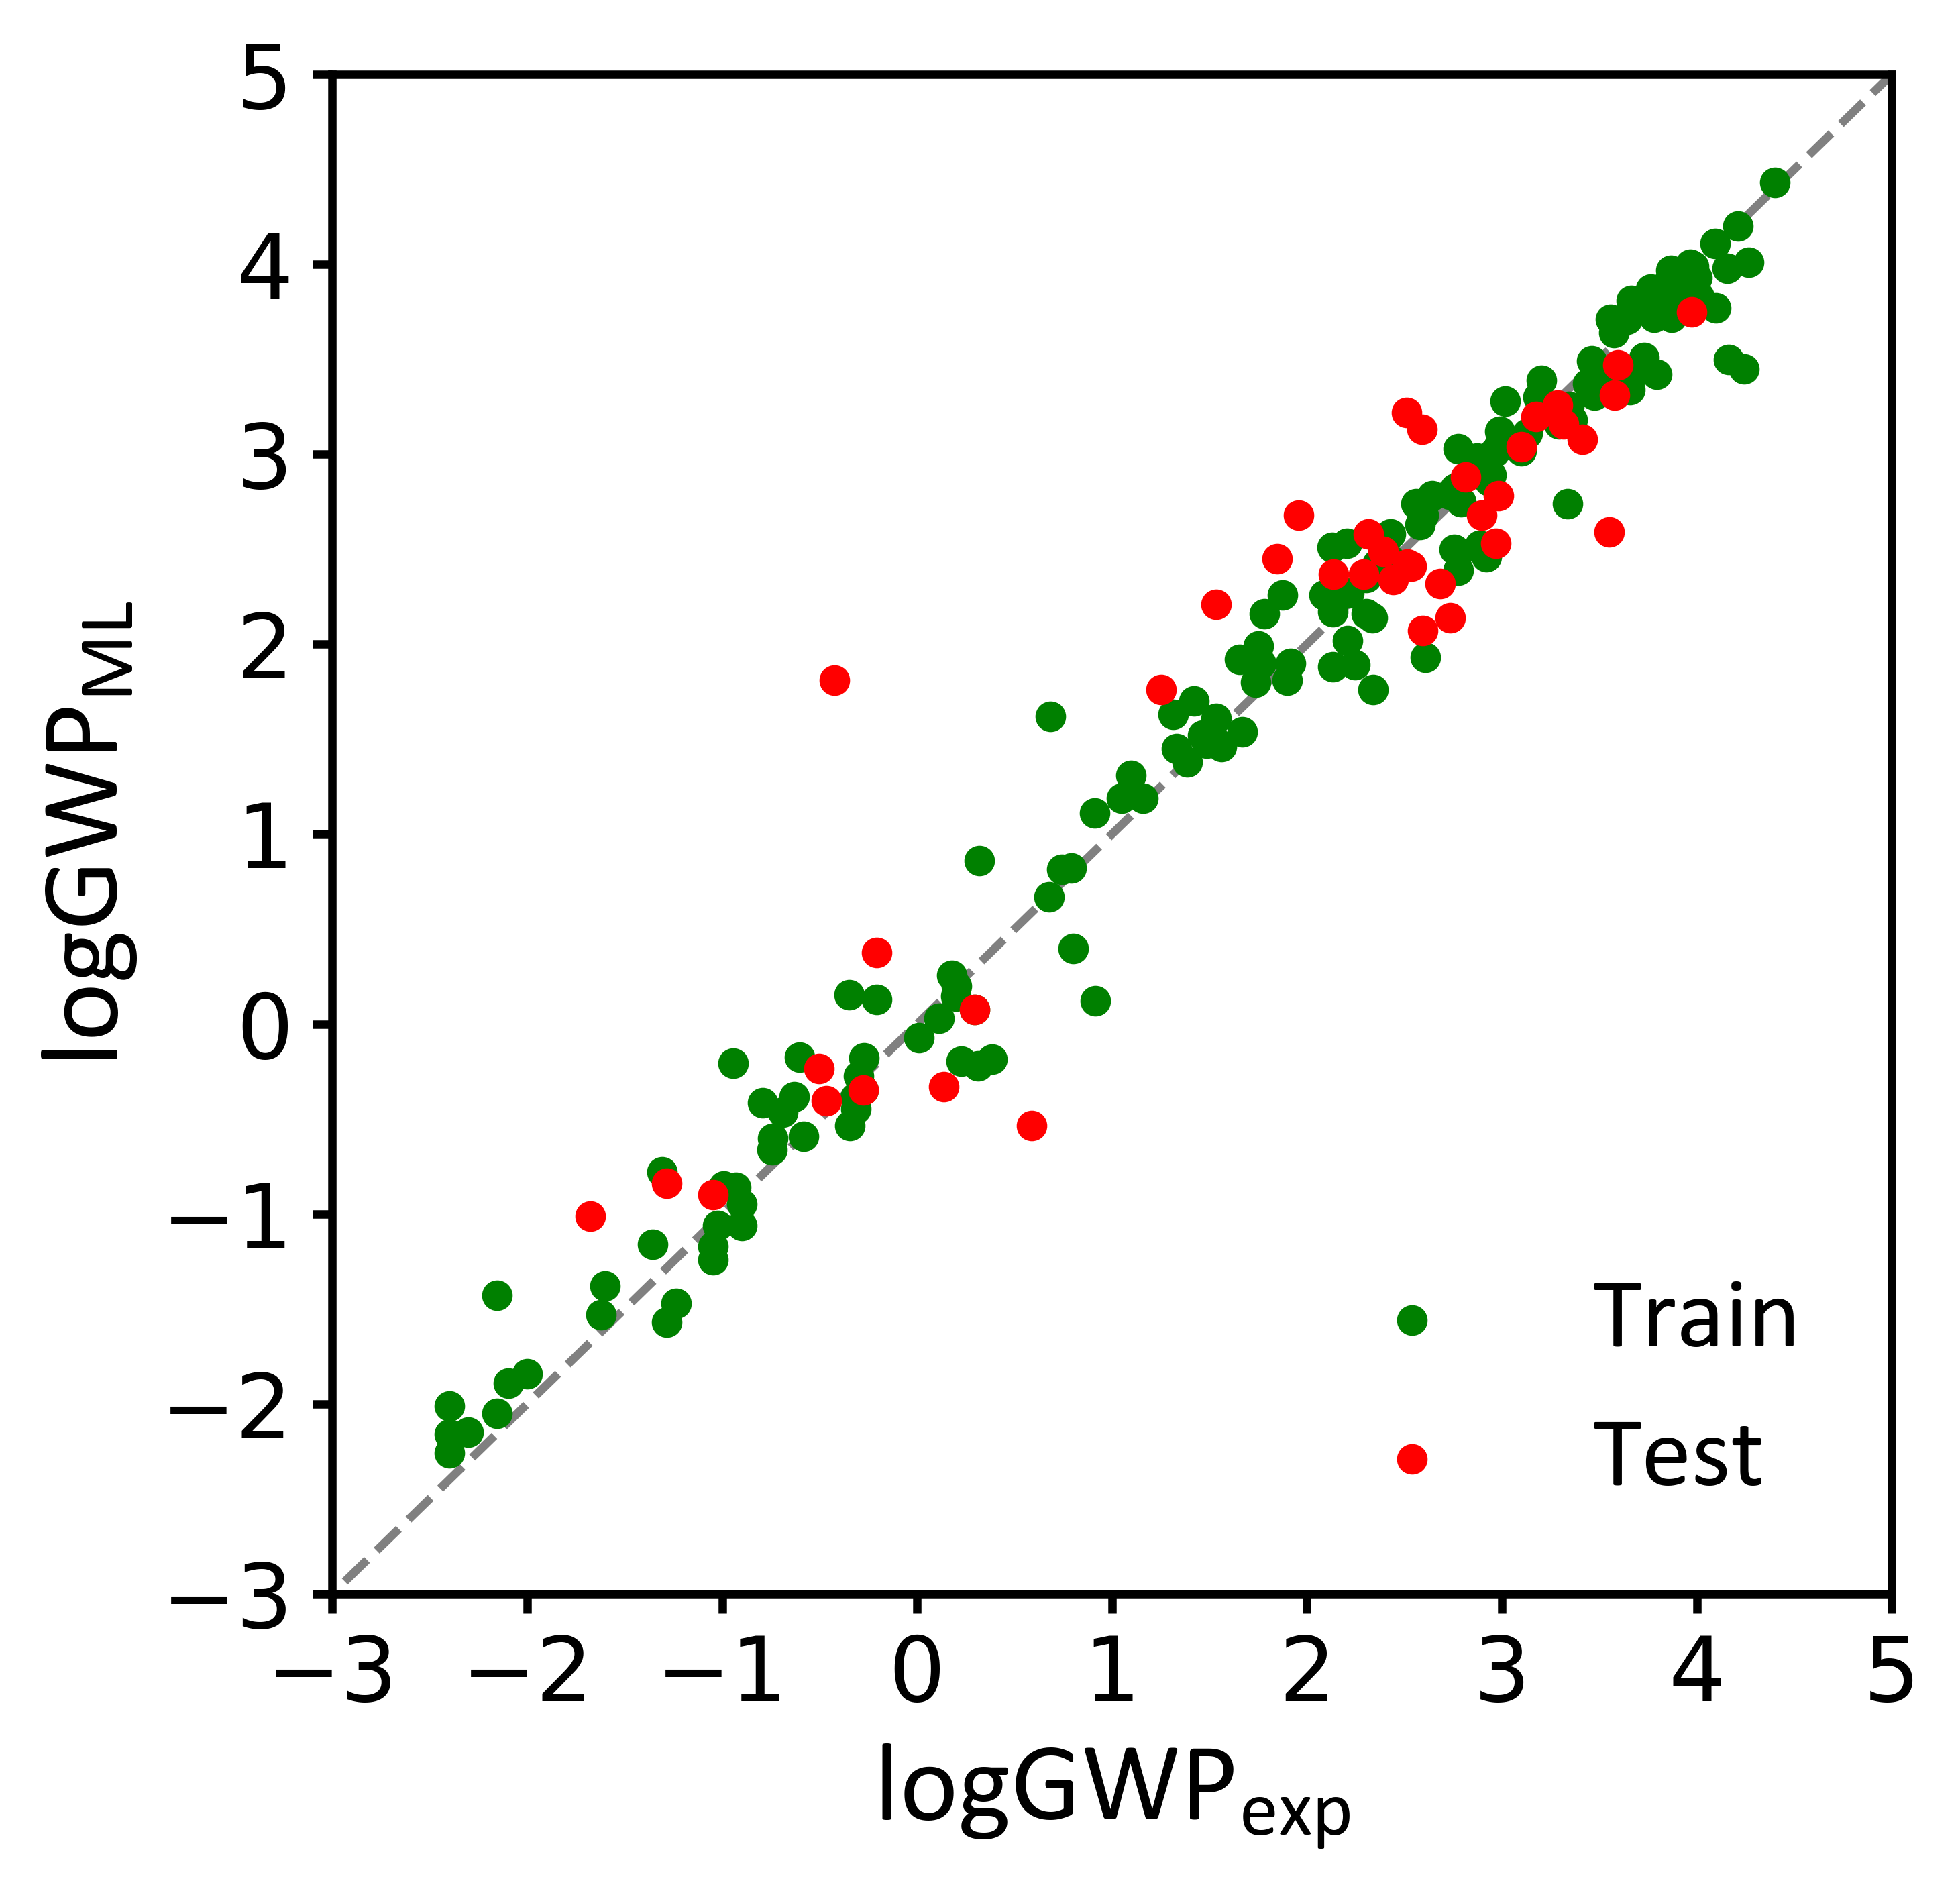

In [17]:
fig, ax = plt.subplots(figsize=(5,5),dpi=600)

x=np.linspace(-10,10)

ax.plot(x,x,'--',c="0.5",zorder=0)

ax1 = ax.scatter(Ytrain,data1["GWP_pre"],marker='o',c="green",s=20,label="Train",linewidths=1)
ax2 = ax.scatter(Ytest,data2["GWP_pre"],marker='o',c="r",s=20,label="Test",linewidths=1)

ax.set_xlim(-3 ,5)
ax.set_ylim(-3 ,5)

ax.legend(prop={'family':'Calibri','size':18},frameon=False,loc="lower right")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

plt.tick_params(axis='both', which='both', direction='out',width=1.5)
# plt.text(-2,4,"Training set", fontweight='bold',fontdict={'family':'Calibri','size':20})

plt.minorticks_off()

plt.xlabel(r'$\mathregular{logGWP_{exp}}$',fontdict={'family':'Calibri','size':20})
plt.ylabel(r"$\mathregular{logGWP_{ML}}$",fontdict={'family':'Calibri','size':20})

plt.show()

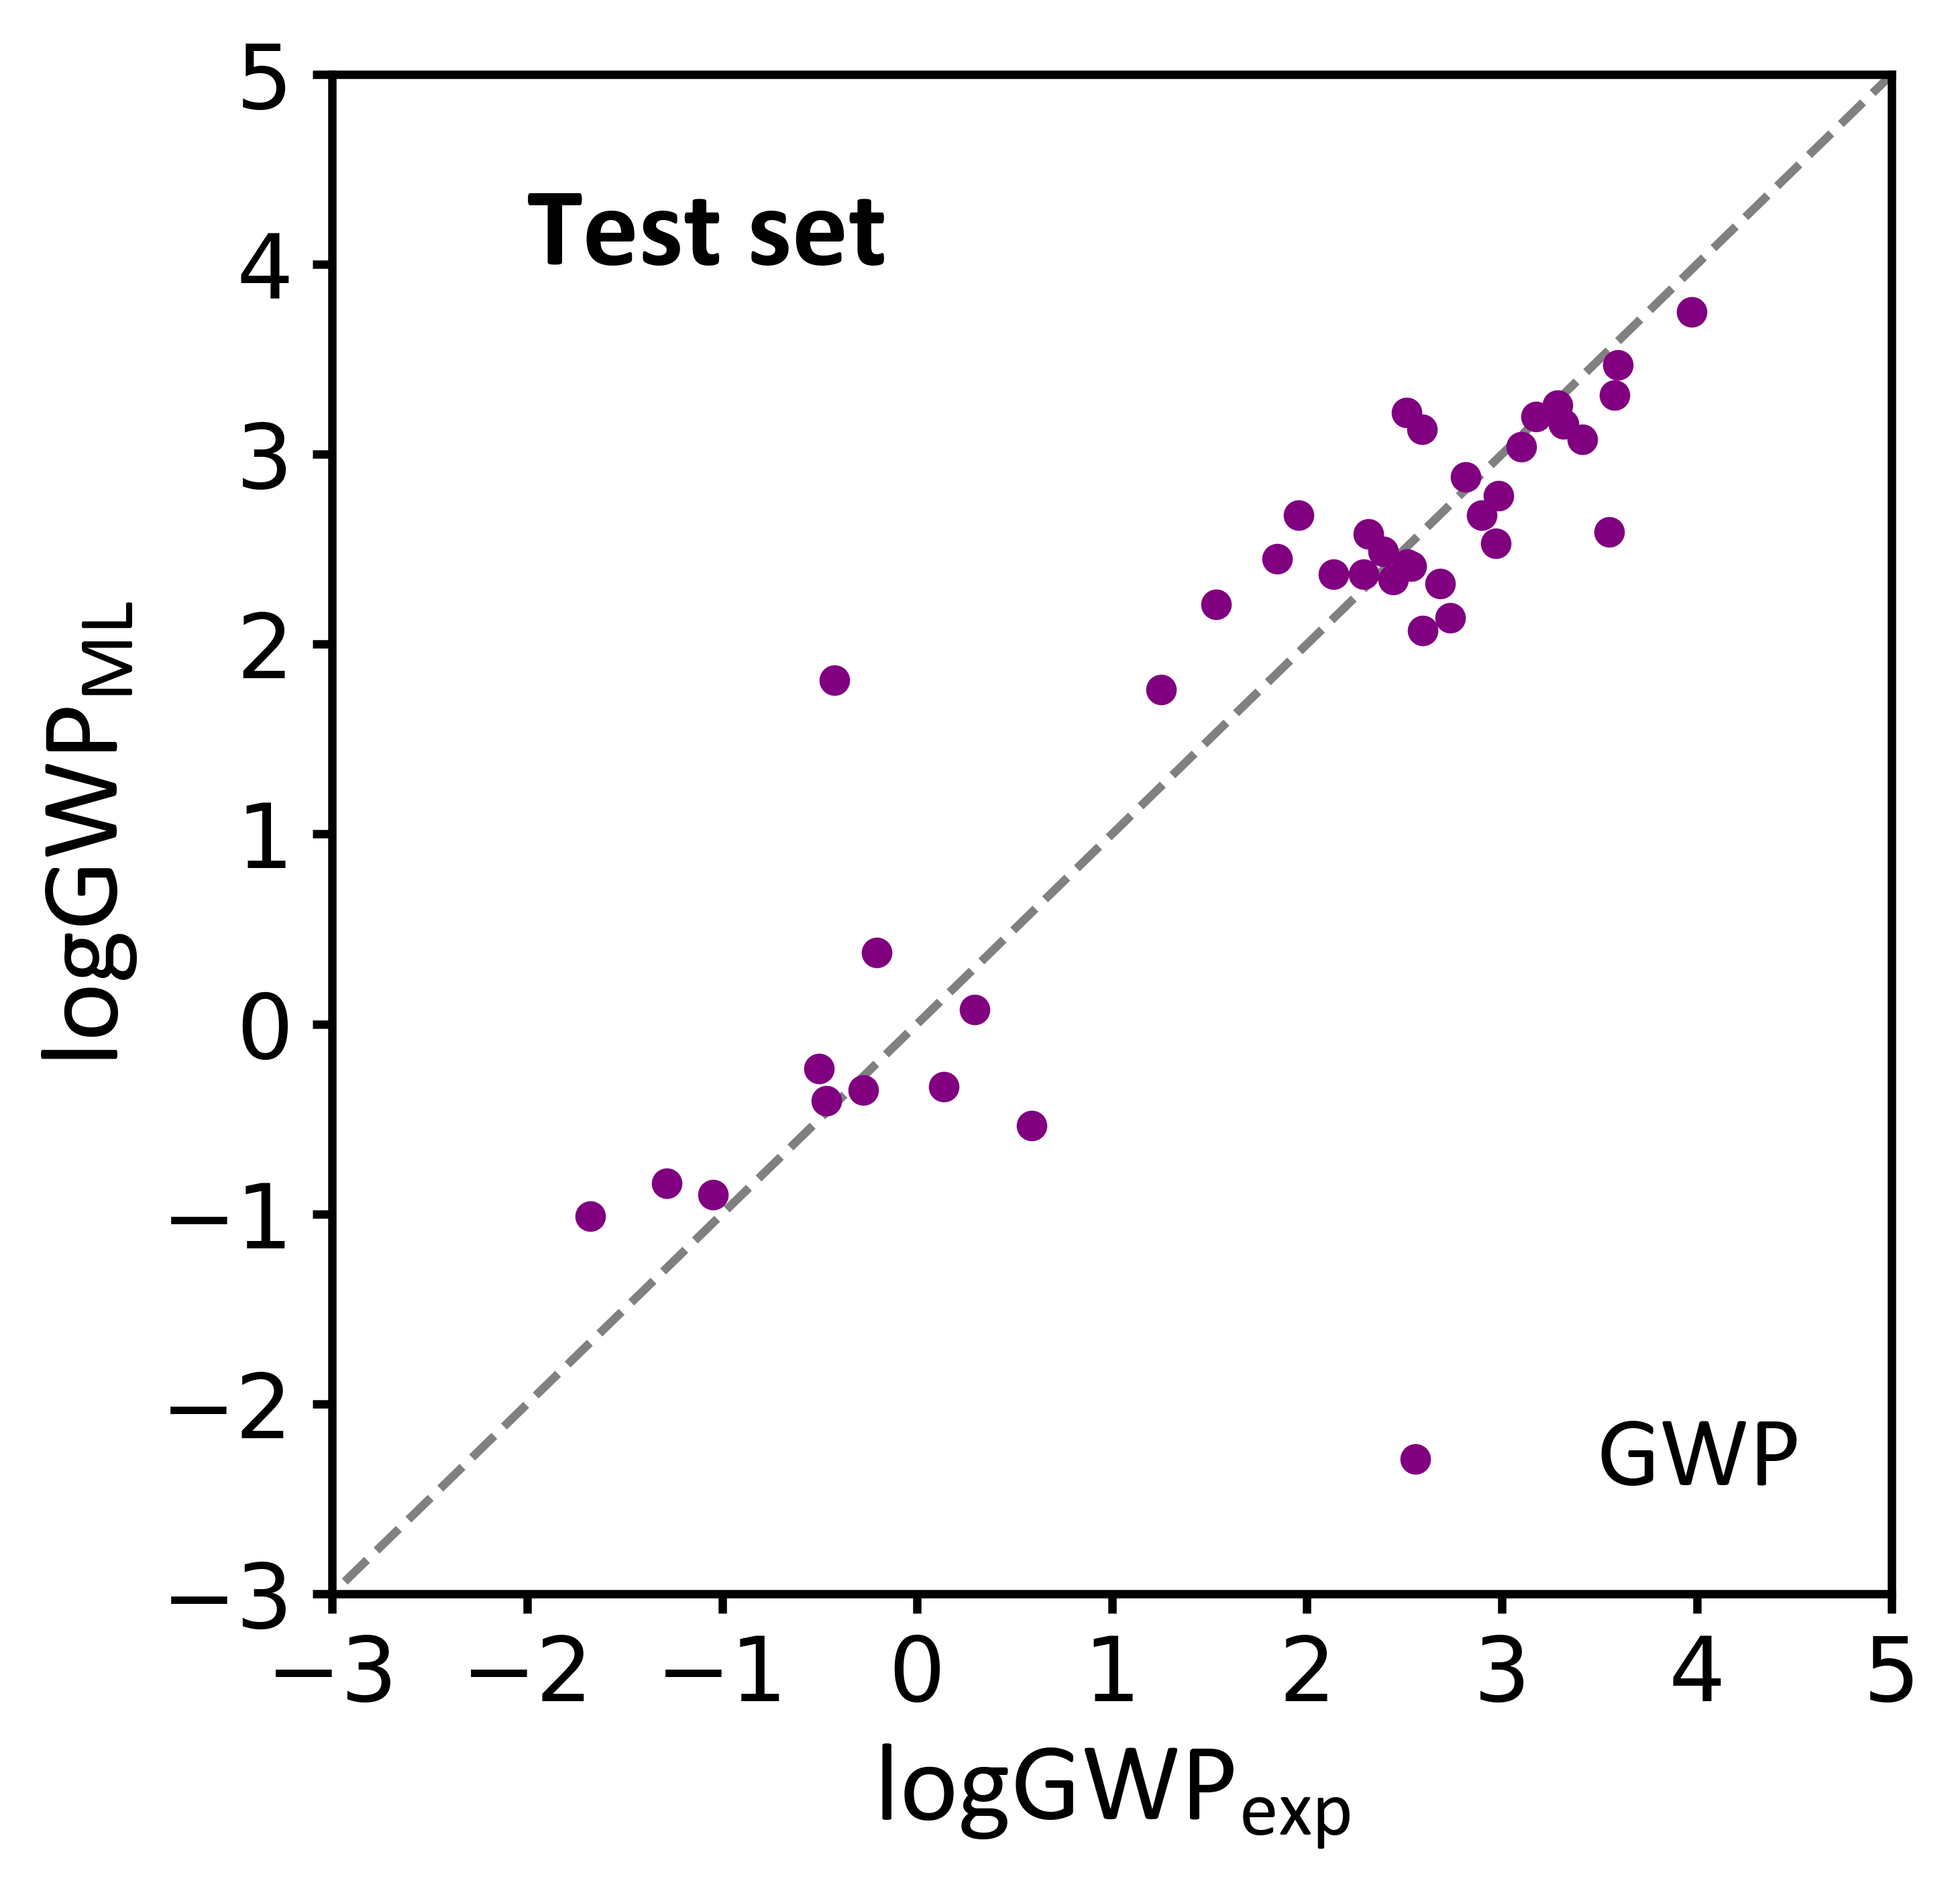

In [109]:
fig, ax = plt.subplots(figsize=(5,5),dpi=600)

x=np.linspace(-10,10)

ax.plot(x,x,'--',c="0.5",zorder=0)

ax1 = ax.scatter(Ytest,data2["GWP_pre"],marker='o',c="purple",s=20,label="GWP",linewidths=1)

ax.set_xlim(-3 ,5)
ax.set_ylim(-3 ,5)

ax.legend(prop={'family':'Calibri','size':18},frameon=False,loc="lower right")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

plt.tick_params(axis='both', which='both', direction='out',width=1.5)
plt.text(-2,4,"Test set", fontweight='bold',fontdict={'family':'Calibri','size':20})

plt.minorticks_off()

plt.xlabel(r'$\mathregular{logGWP_{exp}}$',fontdict={'family':'Calibri','size':20})
plt.ylabel(r"$\mathregular{logGWP_{ML}}$",fontdict={'family':'Calibri','size':20})

plt.show()

In [ ]:
data1=pd.read_csv('./last/IP_EA_train.csv')
data2=pd.read_csv('./last/IP_EA_test.csv')

MAPE1=mean_absolute_percentage_error(Ytrain,data1["LF_pre"])
MAPE1=mean_absolute_percentage_error(Ytest,data2["LF_pre"])